# Predictive Model & Final Report

## Preprocessing

In [24]:
# Load the dataset
import pandas as pd

df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head(5)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
# Check if there's null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9994 non-null   int64  
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

In [26]:
df.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
# Check and remove the duplicates in the dataset

duplicates = df.duplicated() # Check for duplicates
num_duplicates = duplicates.sum() # Count the number of duplicates
print("Number of duplicates:", num_duplicates)
df_unique = df.drop_duplicates() # Remove duplicates

# Print the first few rows of the DataFrame without duplicates
print(df_unique.head())

# Beacuse here's no duplicates found in the dataset, I still use df instead of df_unqique below
# This cell only shows the preprocessing was implemented

Number of duplicates: 0
   RowID         OrderID   OrderDate    ShipDate        ShipMode CustomerID  \
0      1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   CG-12520   
1      2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   CG-12520   
2      3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   DV-13045   
3      4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   SO-20335   
4      5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   SO-20335   

      CustomerName    Segment        Country             City  ... PostalCode  \
0      Claire Gute   Consumer  United States        Henderson  ...      42420   
1      Claire Gute   Consumer  United States        Henderson  ...      42420   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...      90036   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...      33311   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...      33311   

   Region     

In [28]:
# Drop unnecessary columns
df = df.drop(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 
              'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode', 'ProductID',
             'ProductName'], axis=1)
df

,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...
9989,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [29]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Sub-Category'] = label_encoder.fit_transform(df['Sub-Category'])

In [30]:
# Split the data into 80% training data and 20% test data
from sklearn.model_selection import train_test_split

y = df['Profit']
X = df.drop('Profit', axis = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 52)

X_train, X_test, y_train, y_test

(      Region  Category  Sub-Category    Sales  Quantity  Discount
 6216       1         1             7   62.240         8       0.0
 8994       2         1            12   91.360         5       0.2
 9626       0         1            12    9.248         2       0.2
 6112       1         1             8   16.752         6       0.2
 6261       1         1            10   41.400         4       0.0
 ...      ...       ...           ...      ...       ...       ...
 9116       1         0             9   31.968         2       0.2
 4247       1         0             9   20.900         5       0.0
 7693       3         2            13  319.968         4       0.2
 9884       3         2             0   62.310         3       0.0
 7157       3         1            14   87.920         4       0.0
 
 [7995 rows x 6 columns],
       Region  Category  Sub-Category     Sales  Quantity  Discount
 2497       3         1             7   124.460         2       0.0
 6466       3         2         

## Predictive Model - Random Forest

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a list of n_estimators to test
n_estimators_list = list(range(1, 60, 5))

# Initialize dictionaries to store evaluation metrics
mse_scores = {}
mae_scores = {}

# Perform cross-validation for each n_estimators value
for n_estimators in n_estimators_list:
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_mean_squared_error', 'neg_mean_absolute_error'))
    
    # Calculate the average MSE and MAE scores across cross-validation folds
    mse_scores[n_estimators] = -cv_results['test_neg_mean_squared_error'].mean()
    mae_scores[n_estimators] = -cv_results['test_neg_mean_absolute_error'].mean()

# Print the evaluation scores for each n_estimators value
for n_estimators in n_estimators_list:
    print(f"n_estimators: {n_estimators}")
    print(f"MSE: {mse_scores[n_estimators]}")
    print(f"MAE: {mae_scores[n_estimators]}")
    print("")

n_estimators: 1
MSE: 39803.62824002285
MAE: 29.54799542905588

n_estimators: 6
MSE: 22234.375123942995
MAE: 21.715505187353234

n_estimators: 11
MSE: 21902.57713487313
MAE: 20.614707259957548

n_estimators: 16
MSE: 22315.13132674661
MAE: 20.406126506491336

n_estimators: 21
MSE: 21146.4512388873
MAE: 20.12639199758265

n_estimators: 26
MSE: 20172.912896467864
MAE: 20.302719175084338

n_estimators: 31
MSE: 19935.686608017295
MAE: 20.142299264427955

n_estimators: 36
MSE: 19551.931423800423
MAE: 20.118982417848024

n_estimators: 41
MSE: 19568.16166913574
MAE: 20.15011219853216

n_estimators: 46
MSE: 19429.69769749167
MAE: 20.1533988551511

n_estimators: 51
MSE: 19279.26487348834
MAE: 20.114158008134176

n_estimators: 56
MSE: 19542.79224193128
MAE: 20.209327209420575



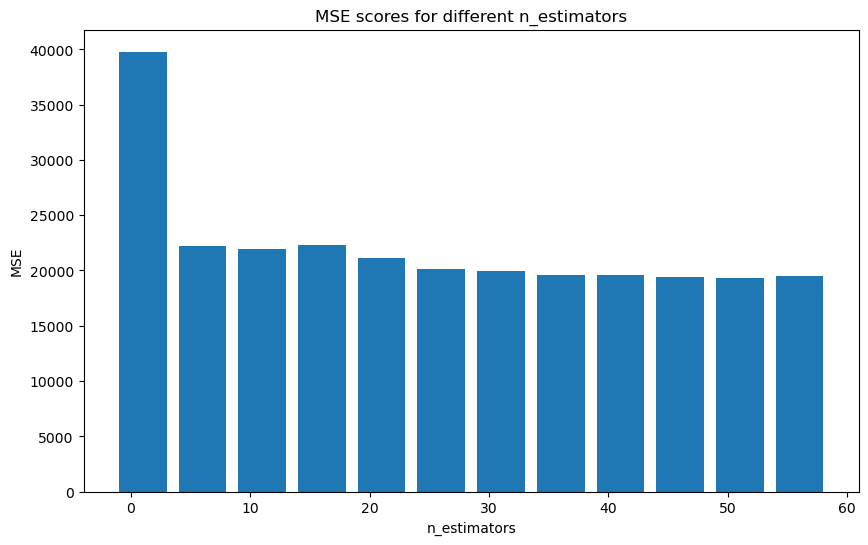

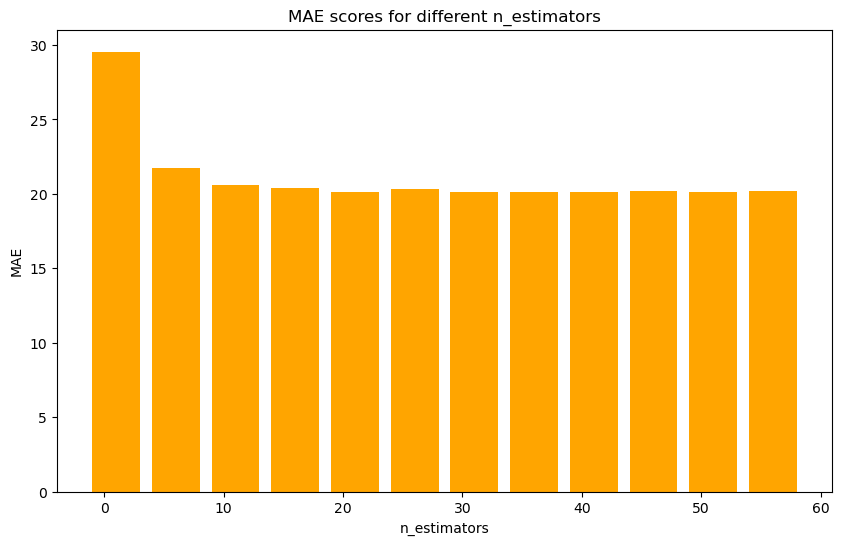

In [32]:
# Plots to show the best n_estimator
import matplotlib.pyplot as plt

# Plotting the MSE bar chart
plt.figure(figsize=(10, 6))
plt.bar(n_estimators_list, mse_scores.values(), width=4)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE scores for different n_estimators')

# Plotting the MAE bar chart
plt.figure(figsize=(10, 6))
plt.bar(n_estimators_list, mae_scores.values(), width=4, color='orange')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('MAE scores for different n_estimators')

plt.show()

In [33]:
# Another approach to find the optimal n_estimators and max_depth by GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [11, 16, 21, 26, 31, 36, 41, 46, 51, 56], 
              'max_depth': [None, 5, 10, 15, 20]}

model = RandomForestRegressor(random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)

# Get the best parameters and print them
best_params = grid_search.best_params_
print('The best parameters are:', best_params)

The best parameters are: {'max_depth': None, 'n_estimators': 51}


In [34]:
# Use the optimal parameter to fit best model and evaluate the model

# Initialize and train the Random Forest model
best_model = RandomForestRegressor(n_estimators=51, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the mean squared error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the R-square of the predictions
r_square = r2_score(y_test, y_pred)
print('R-squared: ', r_square)

Mean Squared Error (MSE): 6855.9908499049525
Mean Absolute Error (MAE): 17.79375575233118
R-squared:  0.8495707150908479


In [35]:
# Rank the importance of features in the Random Forest model

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

        Feature  Importance
3         Sales    0.664722
5      Discount    0.211725
2  Sub-Category    0.055954
4      Quantity    0.029386
0        Region    0.027245
1      Category    0.010967


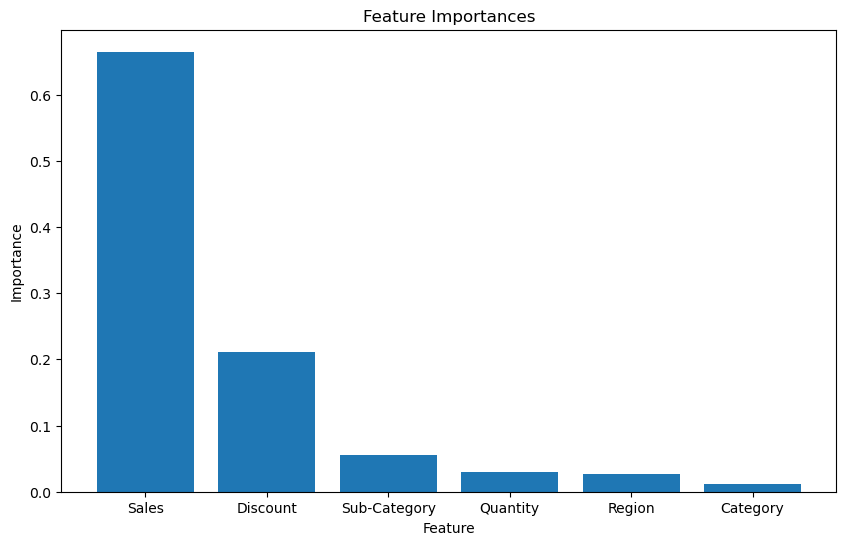

In [36]:
# Visualize the ranking about importance of features
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()